In [1]:
%matplotlib inline

In [12]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]


In [13]:
from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
sdss['rvir_halo_kpc'] = halo_radius_vs_stellar_mass(10**sdss['sm'])

In [14]:
from galsize_models.measurements.rhalf_rvir_power_law_fit import rvir_rhalf_power_law_index_and_normalization as c1_c0_fit

In [15]:
alpha_all, norm_all = c1_c0_fit(sdss['r50_magr_kpc_meert15'], sdss['rvir_halo_kpc'])

In [16]:
mask_q = sdss['ssfr'] < -11.25
alpha_q, norm_q = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_q], 
                                sdss['rvir_halo_kpc'][mask_q])

In [17]:
mask_sf = sdss['ssfr'] > -10.75
alpha_sf, norm_sf = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_sf], 
                                sdss['rvir_halo_kpc'][mask_sf])

In [18]:
mask_gv = (sdss['ssfr'] < -10.75) & (sdss['ssfr'] >= -11.25)
alpha_gv, norm_gv = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_gv], 
                                sdss['rvir_halo_kpc'][mask_gv])

In [19]:
from scipy.stats import binned_statistic

log10_rhalo_bins = np.linspace(np.log10(100), np.log10(1500), 25)
rhalo_bins = 10**log10_rhalo_bins
log10_rhalo_bin_mids = 0.5*(log10_rhalo_bins[:-1] + log10_rhalo_bins[1:])

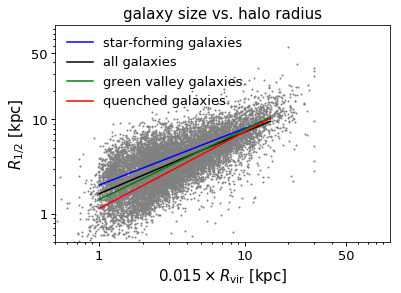

In [20]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 20
__=ax.scatter(0.01*sdss['rvir_halo_kpc'][::nskip], 
              sdss['r50_magr_kpc_meert15'][::nskip], 
              color='gray', s=1, label='')

rhalo_abscissa = np.linspace(100, 1500, 200)
__=ax.plot(0.01*rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, 
          color='blue', label='star-forming galaxies')
__=ax.plot(0.01*rhalo_abscissa, norm_all*rhalo_abscissa**alpha_all, 
          color='k', label='all galaxies')
__=ax.plot(0.01*rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, 
          color='green', label='green valley galaxies')
__=ax.plot(0.01*rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, 
          color='red', label='quenched galaxies')


xlim = ax.set_xlim(0.5, 100)
ylim = ax.set_ylim(0.5, 100)
__=ax.set_xticks((1, 10, 50))
__=ax.set_yticks((1, 10, 50))
from matplotlib import ticker
__=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$0.015\times R_{\rm vir}$ [kpc]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. halo radius')
legend = ax.legend()


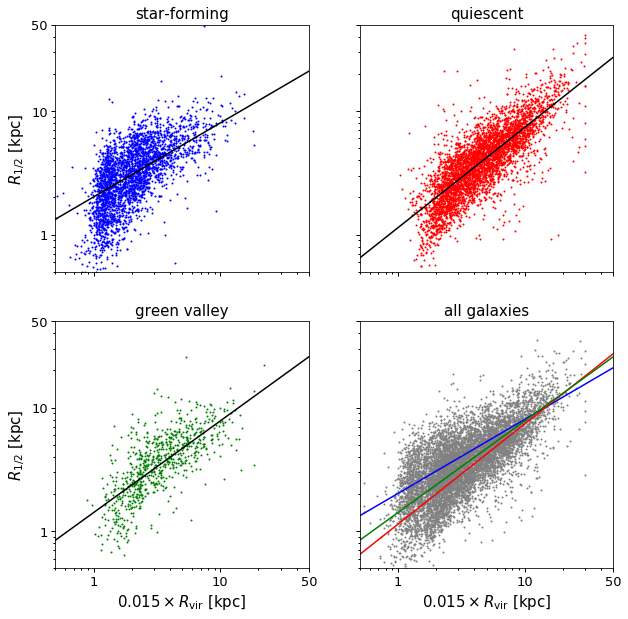

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                            figsize=(10, 10))

__=ax1.loglog(); __=ax2.loglog(); __=ax3.loglog(); __=ax4.loglog()

nskip = 30
__=ax1.scatter(0.01*sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')
__=ax2.scatter(0.01*sdss['rvir_halo_kpc'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')
__=ax3.scatter(0.01*sdss['rvir_halo_kpc'][mask_gv][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_gv][::nskip], 
              color='green', s=1, label='')
__=ax4.scatter(0.01*sdss['rvir_halo_kpc'][::nskip], 
              sdss['r50_magr_kpc_meert15'][::nskip], 
              color='gray', s=1, label='')


rhalo_abscissa = np.linspace(10, 50000, 200)
__=ax1.plot(0.01*rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, color='k')
# __=ax1.plot(0.01*rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='red')

# __=ax2.plot(0.01*rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, color='blue')
__=ax2.plot(0.01*rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='k')

__=ax3.plot(0.01*rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, color='k')

__=ax4.plot(0.01*rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, color='blue')
__=ax4.plot(0.01*rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='red')
__=ax4.plot(0.01*rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, color='green')


xlim1 = ax1.set_xlim(0.5, 50)
ylim1 = ax1.set_ylim(0.5, 50)
xlim2 = ax2.set_xlim(0.5, 50)
ylim2 = ax2.set_ylim(0.5, 50)
xlim3 = ax3.set_xlim(0.5, 50)
ylim3 = ax3.set_ylim(0.5, 50)
xlim4 = ax4.set_xlim(0.5, 50)
ylim4 = ax4.set_ylim(0.5, 50)

__=ax1.set_xticks((1, 10, 50))
__=ax1.set_yticks((1, 10, 50))
from matplotlib import ticker
__=ax1.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel3 = ax3.set_xlabel(r'$0.015\times R_{\rm vir}$ [kpc]')
ylabel1 = ax1.set_ylabel(r'$R_{1/2}$ [kpc]')
xlabel4 = ax4.set_xlabel(r'$0.015\times R_{\rm vir}$ [kpc]')
ylabel3 = ax3.set_ylabel(r'$R_{1/2}$ [kpc]')
title1 = ax1.set_title('star-forming')
title2 = ax2.set_title('quiescent')
title3 = ax3.set_title('green valley')
title4 = ax4.set_title('all galaxies')

fig.savefig('galsize_vs_rhalo_power_law_fits.pdf', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')
